##### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install xgboost

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [20]:
import os
print(os.getcwd())

C:\Users\Administrator\Downloads\customer_churn_project


In [30]:
customer_churn = pd.read_csv("C:\\Users\\Administrator\\Downloads\\customer_churn_project\\data\\customer_churn_data.csv")


In [32]:
print(customer_churn)

     CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0             1   49    Male       4           88.35  Month-to-Month   
1             2   43    Male       0           36.67  Month-to-Month   
2             3   51  Female       2           63.79  Month-to-Month   
3             4   60  Female       8          102.34        One-Year   
4             5   42    Male      32           69.01  Month-to-Month   
..          ...  ...     ...     ...             ...             ...   
995         996   42    Male      41           37.14  Month-to-Month   
996         997   62    Male       9           80.93  Month-to-Month   
997         998   51  Female      15          111.72  Month-to-Month   
998         999   39    Male      68           65.67        One-Year   
999        1000   50    Male       1           56.67  Month-to-Month   

    InternetService  TotalCharges TechSupport Churn  
0       Fiber Optic        353.40         Yes   Yes  
1       Fiber Optic        

##### Analyzing Data

In [34]:
print(customer_churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB
None


In [36]:
print(customer_churn.describe())

        CustomerID          Age      Tenure  MonthlyCharges  TotalCharges
count  1000.000000  1000.000000  1000.00000     1000.000000   1000.000000
mean    500.500000    44.674000    18.97300       74.391290   1404.364060
std     288.819436     9.797741    18.89257       25.712083   1571.755048
min       1.000000    12.000000     0.00000       30.000000      0.000000
25%     250.750000    38.000000     5.00000       52.357500    345.217500
50%     500.500000    45.000000    13.00000       74.060000    872.870000
75%     750.250000    51.000000    26.00000       96.102500   1900.175000
max    1000.000000    83.000000   122.00000      119.960000  12416.250000


In [38]:
print(customer_churn.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64


###### We are handling Missing Values (InternetService has 703 non-null out of 1000)
###### Instead of dropping rows, we'll fill with "No Service"

In [43]:
customer_churn['InternetService'] = customer_churn['InternetService'].fillna("No Service")

In [45]:
print(customer_churn)

     CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0             1   49    Male       4           88.35  Month-to-Month   
1             2   43    Male       0           36.67  Month-to-Month   
2             3   51  Female       2           63.79  Month-to-Month   
3             4   60  Female       8          102.34        One-Year   
4             5   42    Male      32           69.01  Month-to-Month   
..          ...  ...     ...     ...             ...             ...   
995         996   42    Male      41           37.14  Month-to-Month   
996         997   62    Male       9           80.93  Month-to-Month   
997         998   51  Female      15          111.72  Month-to-Month   
998         999   39    Male      68           65.67        One-Year   
999        1000   50    Male       1           56.67  Month-to-Month   

    InternetService  TotalCharges TechSupport Churn  
0       Fiber Optic        353.40         Yes   Yes  
1       Fiber Optic        

In [47]:
print(customer_churn.isnull().sum())

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64


##### Visual Insights

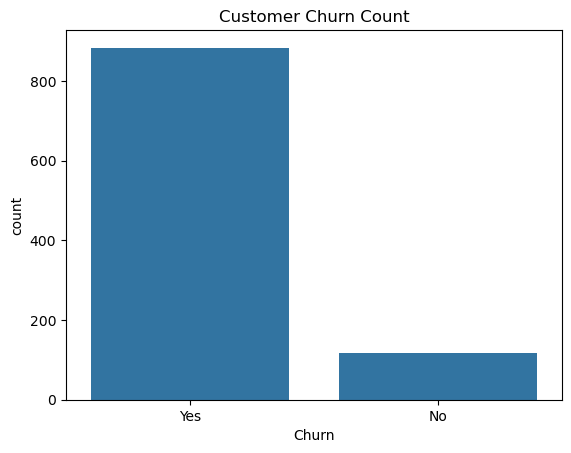

In [52]:
 # Churn Count Plot
sns.countplot(data=customer_churn, x='Churn')
plt.title("Customer Churn Count")
plt.show()

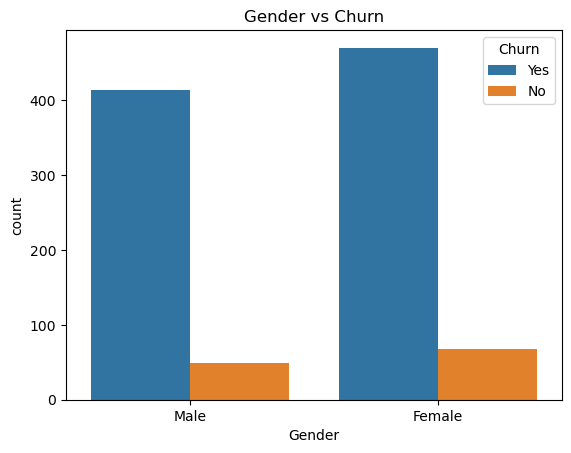

In [54]:
# Gender vs Churn
sns.countplot(data=customer_churn, x='Gender', hue='Churn')
plt.title("Gender vs Churn")
plt.show()


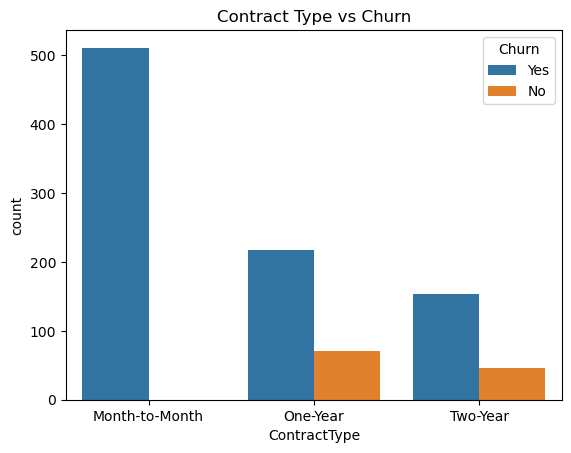

In [56]:
# Contract Type vs Churn
sns.countplot(data=customer_churn, x='ContractType', hue='Churn')
plt.title("Contract Type vs Churn")
plt.show()

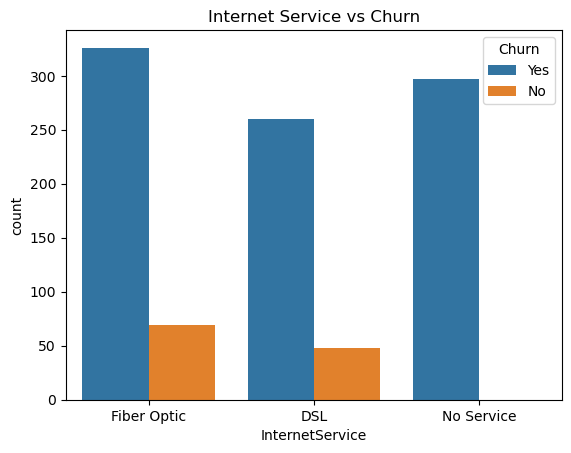

In [58]:
# Internet Service vs Churn
sns.countplot(data=customer_churn, x='InternetService', hue='Churn')
plt.title("Internet Service vs Churn")
plt.show()

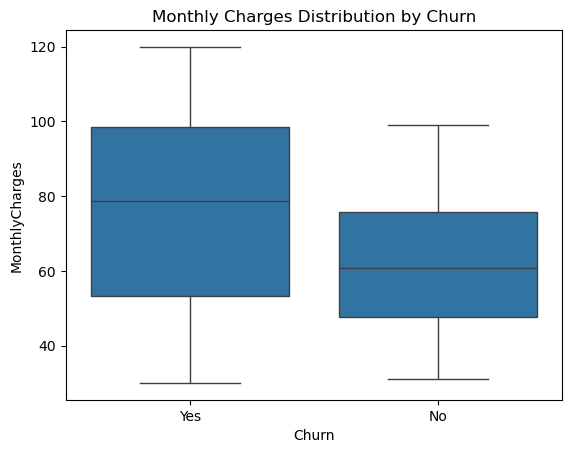

In [60]:
# Boxplot of Monthly Charges vs Churn
sns.boxplot(data=customer_churn, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges Distribution by Churn")
plt.show()

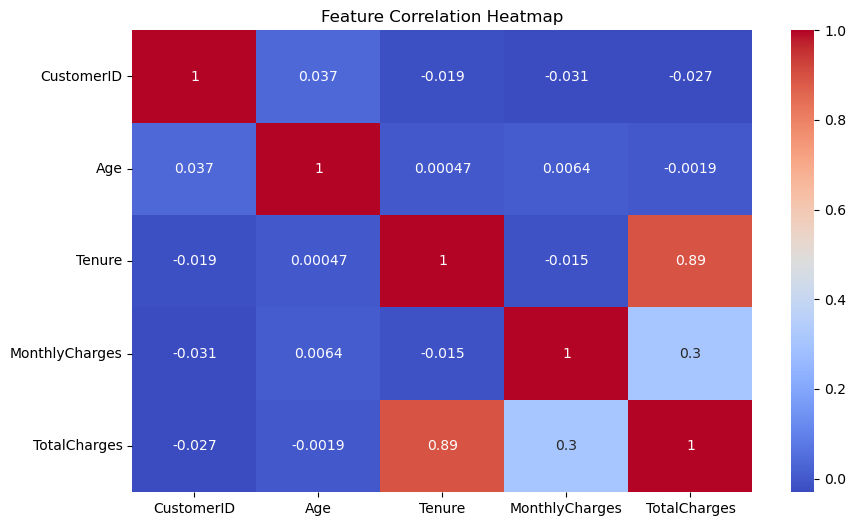

In [68]:
# Select numeric columns only
numeric_cols = customer_churn.select_dtypes(include=['number']).columns

# Create the correlation matrix for numeric columns
corr_matrix = customer_churn[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

##### We are Encoding  Categorical Features

In [71]:
from sklearn.preprocessing import LabelEncoder
import joblib

# List of features to encode
categorical_cols = ['Gender', 'ContractType', 'InternetService', 'TechSupport']
encoders = {}

# Apply Label Encoding and save each encoder
for col in categorical_cols:
    le = LabelEncoder()
    customer_churn[col] = le.fit_transform(customer_churn[col])
    encoders[col] = le
    joblib.dump(le, f"model/encoder_{col.lower()}.pkl")  # Save encoder

# Encode target variable separately (Churn)
le_churn = LabelEncoder()
customer_churn['Churn'] = le_churn.fit_transform(customer_churn['Churn'])
joblib.dump(le_churn, "model/encoder_churn.pkl")

['model/encoder_churn.pkl']

##### Feature Scaling

In [96]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']
customer_churn[numerical_cols] = scaler.fit_transform(customer_churn[numerical_cols])

##### Drop Irrelevant Columns

In [99]:
customer_churn.drop(columns=['CustomerID'], inplace=True)

##### Feature & Target Split

In [104]:
X = customer_churn.drop('Churn', axis=1)
y = customer_churn['Churn']

In [106]:
from sklearn.preprocessing import StandardScaler
import joblib

# Select numeric columns for scaling
numeric_cols = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize and fit scaler
scaler = StandardScaler()
customer_churn[numeric_cols] = scaler.fit_transform(customer_churn[numeric_cols])

# Save the fitted scaler
joblib.dump(scaler, 'model/scaler.pkl')

['model/scaler.pkl']

##### Train/Test Split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Model 1: Logistic Regression

In [118]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

In [120]:
print("Logistic Regression Results:")
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))

Logistic Regression Results:
[[ 11  12]
 [  4 173]]
              precision    recall  f1-score   support

           0       0.73      0.48      0.58        23
           1       0.94      0.98      0.96       177

    accuracy                           0.92       200
   macro avg       0.83      0.73      0.77       200
weighted avg       0.91      0.92      0.91       200



##### Model 2: XGBoost Classifier

In [125]:
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [127]:
print("XGBoost Classifier Results:")
print(confusion_matrix(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

XGBoost Classifier Results:
[[ 23   0]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



##### Optional: Plot Feature Importance

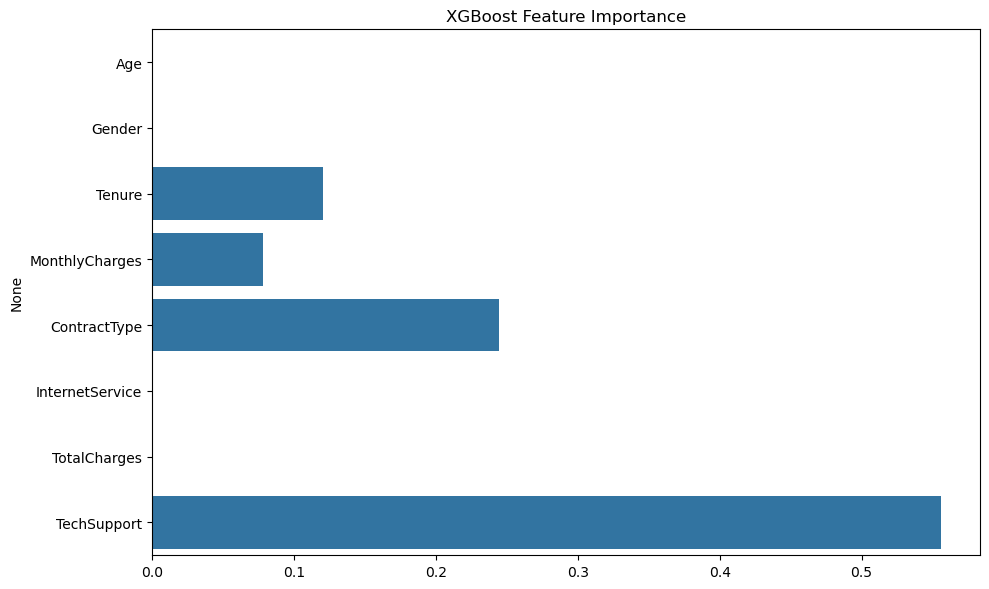

In [133]:
plt.figure(figsize=(10,6))
sns.barplot(x=xgb_model.feature_importances_, y=X.columns)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()